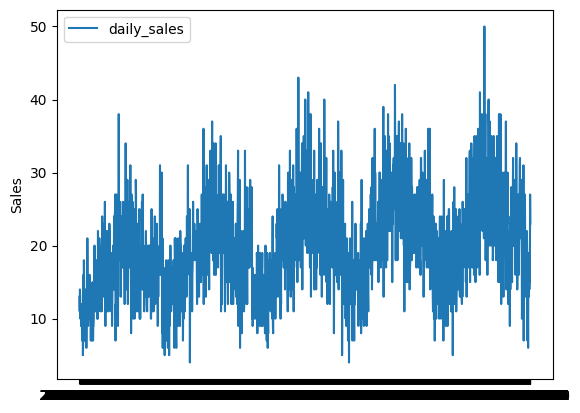

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("./data/train.csv")
small_df = df.query('store == 1 & item == 1 ')
#print(small_df)
#matplotlibで可視化する
plt.ylabel("Sales")
plt.plot(small_df["date"], small_df["sales"], label="daily_sales")
plt.legend(loc = 'upper left')
plt.show()


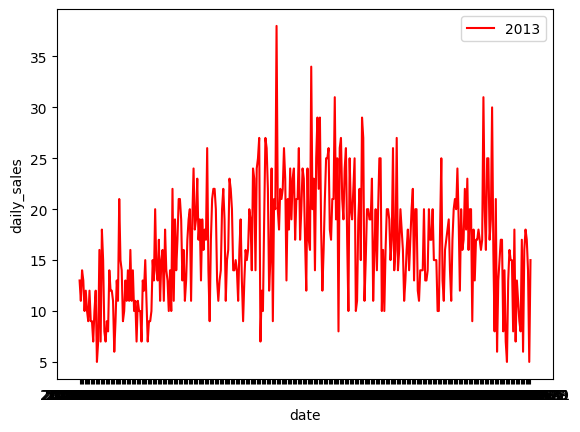

In [4]:
small_df_2013 = small_df.query("date.str.contains('2013')", engine='python')
#print(small_df_2013)
#matplotlibで可視化する
plt.ylabel("daily_sales")
plt.plot(small_df_2013["date"], small_df_2013["sales"], color = "red", label="2013")
plt.xlabel("date")
plt.legend(loc = 'upper right')
plt.show()

WARNING - (py.warnings._showwarnmsg) - /var/folders/m_/13jbrbyd5rd2f89yf7wq0zbw0000gn/T/ipykernel_57983/315206474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_2013["rolling_mean_3"] = small_df_2013["sales"].rolling(window = 3).mean()



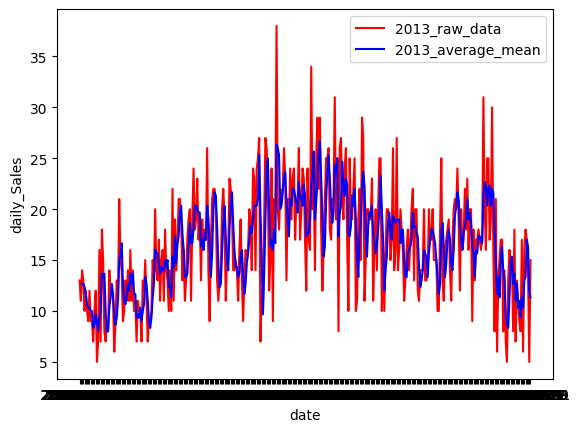

In [5]:
#Store==1、item==1、year==2013のデータに絞る。
#今回は前３日間の移動平均をとったデータをデータセットに追加して生データと比較する。
small_df_2013["rolling_mean_3"] = small_df_2013["sales"].rolling(window = 3).mean()
#可視化
plt.plot(small_df_2013["date"],small_df_2013["sales"], color ="red",label = '2013_raw_data')
plt.plot(small_df_2013["date"],small_df_2013["rolling_mean_3"], color ="blue",label = '2013_average_mean')
plt.ylabel("daily_Sales")
plt.xlabel("date")
plt.legend(loc = 'upper right')
plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/hanhlh/exp/le_python3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/hanhlh/exp/le_python3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/hanhlh/exp/le_python3.12/lib/python3.12/site-packages/neur

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/hanhlh/exp/le_python3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/hanhlh/exp/le_python3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/hanhlh/exp/le_python3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /var/folders/m_/13jbrbyd5rd2f89yf7wq0zbw0000gn/T/ipykernel_57983/3730121661.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred"] = forecast["yhat1"].to_list()



MAE　(NeuralProphet):
3.936992600845964


<Axes: title={'center': 'Forecast evaluation'}>

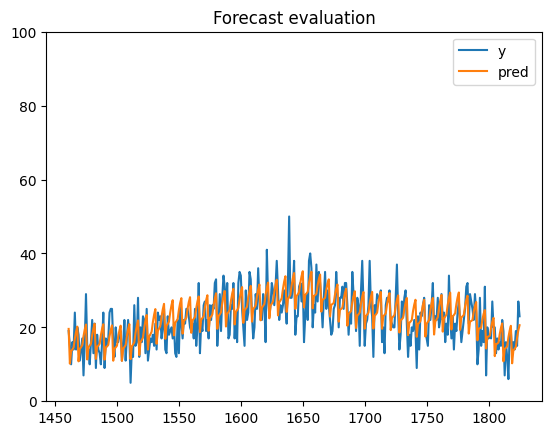

In [6]:
from neuralprophet import NeuralProphet
#データセットの準備
df1 = pd.read_csv("./data/train.csv")
df1 = df1.query('store == 1 & item == 1')
df1 = df1.drop(["store", "item"], axis=1)
df1 = df1.rename(columns = {"date": "ds", "sales": "y"})
#データセットの分割
train = df1[:-365]#2013-2016年の販売実績
test = df1[-365:]#2017年の販売実績
#機械学習モデルのインストタンス作成
m = NeuralProphet(seasonality_mode='multiplicative')
#validationの設定(3:1)&モデルのトレーニング
metrics = m.fit(train,freq="D")
#作ったモデルで２０１７年のSalesを予測(trainデータの先３６５日分を予測)
future = m.make_future_dataframe(train, periods=365)
forecast = m.predict(future)
#予測結果をtestのデータフレームに追加
test["pred"] = forecast["yhat1"].to_list()
#MAEで精度を確認
from sklearn.metrics import mean_absolute_error
print('MAE　(NeuralProphet):')
print(mean_absolute_error(test['y'], test['pred']))#3.9889207134508107
#可視化 
test.plot(title='Forecast evaluation',ylim=[0,100])

In [9]:
print(df1)

              ds   y
0     2013-01-01  13
1     2013-01-02  11
2     2013-01-03  14
3     2013-01-04  13
4     2013-01-05  10
...          ...  ..
1821  2017-12-27  14
1822  2017-12-28  19
1823  2017-12-29  15
1824  2017-12-30  27
1825  2017-12-31  23

[1826 rows x 2 columns]
